<p style="font-family: Arial; font-size:1.8em;color:green;"> Imports and Loading Dataset </p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("module2.csv")
df.head()
#print(df.info())

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


<p style="font-family: Arial; font-size:1.8em;color:green;"> Treating Categorical Variables through label encoding </p>

<p style="font-family: Arial; font-size:1.2em;color:green;"> The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. </p>

In [13]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
print(X)
# All discrete features should now have integer dtypes (double-check this before using MI!)
#print(X.info())
discrete_features = X.dtypes == int

     symboling  make  fuel_type  aspiration  num_of_doors  body_style  \
0            3     0          0           0             2           0   
1            3     0          0           0             2           0   
2            1     0          0           0             2           1   
3            2     1          0           0             4           2   
4            2     1          0           0             4           2   
..         ...   ...        ...         ...           ...         ...   
188         -1    20          0           0             4           2   
189         -1    20          0           1             4           2   
190         -1    20          0           0             4           2   
191         -1    20          1           1             4           2   
192         -1    20          0           1             4           2   

     drive_wheels  engine_location  wheel_base  length  ...  num_of_cylinders  \
0               0                0        

<p style="font-family: Arial; font-size:1.8em;color:green;"> MI Score calculation function declaration</p>

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          0.914889
horsepower           0.885499
length               0.612029
fuel_system          0.462752
drive_wheels         0.332695
peak_rpm             0.230167
compression_ratio    0.101162
fuel_type            0.047279
Name: MI Scores, dtype: float64

<p style="font-family: Arial; font-size:1.8em;color:green;"> MI Score Plot function declaration</p>

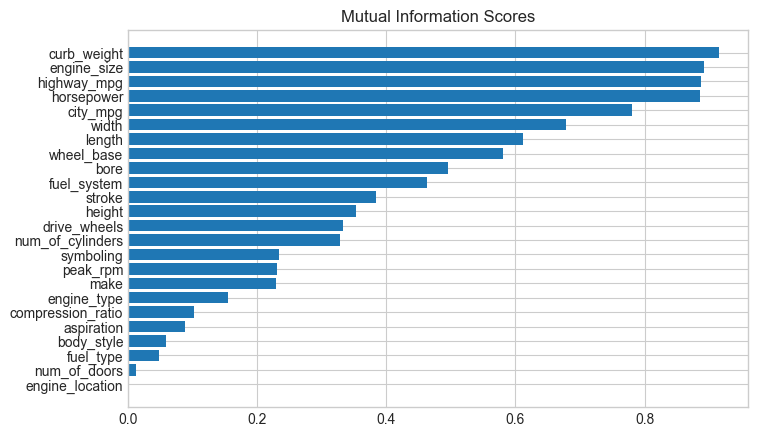

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<p style="font-family: Arial; font-size:1.8em;color:green;"> MI Score Analysis.</p>

<p style="font-family: Arial; font-size:1.2em;color:green;"> As we might expect, the high-scoring curb_weight feature exhibits a strong relationship with price, the target. MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.It is a univariate metric.The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.</p>

<p style="font-family: Arial; font-size:1.2em;color:green;">The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships. </p>

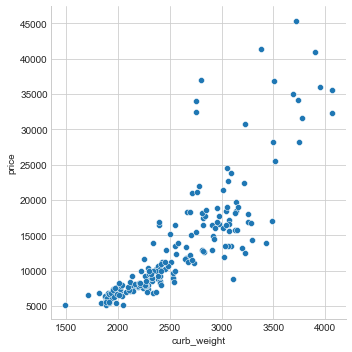

In [6]:
# To show curb_weight exhibits Strong relationship with price 
sns.relplot(x="curb_weight", y="price", data=df);

<p style="font-family: Arial; font-size:1.8em;color:green;"> MI Score for Classification</p>

In [17]:
# MI score for a classifications problem 
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Creating Dummy dataset 
X = np.array([[0, 'a', 0],
              [1, 'a', 0],
              [2, 'b', 1],
              [2, 'b', 1],
              [2, 'c', 1]])
# Creating Dummy dataset Dataframe
dataset = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1], 'Column3': X[:, 2]})

# Converting Categorical Columns to Numeric using Label encoding.
for colname in dataset.select_dtypes("object"):
    dataset[colname], _ = dataset[colname].factorize()
#print(dataset)

# Creating Target Variable Vector 
y = np.array([1, 1, 2, 2, 3])

# Getting the MI score 
classf_feature_score = mutual_info_classif(dataset, y, discrete_features=True)

# Viewing the classification score for X's features.
print(classf_feature_score)

   Column1  Column2  Column3
0        0        0        0
1        1        0        0
2        2        1        1
3        2        1        1
4        2        2        1
[0.67301167 1.05492017 0.67301167]


<p style="font-family: Arial; font-size:1.8em;color:green;"> Conclusion </p>

<p style="font-family: Arial; font-size:1.2em;color:green;"> We have already learnt that the advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships. Focus on how correlation is important and advantages of it in feature engineering. </p>